In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

In [2]:
df = pd.read_csv(r"C:\Users\munja\OneDrive\Documents\marketing_campaign.csv")
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


In [3]:
df.shape

(365, 17)

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.dtypes

Date                                               datetime64[ns]
Facebook Ad Campaign                                       object
Facebook Ad Views                                           int64
Facebook Ad Clicks                                          int64
Facebook Ad Conversions                                     int64
Cost per Facebook Ad                                       object
Facebook Click-Through Rate (Clicks / View)                object
Facebook Conversion Rate (Conversions / Clicks)            object
Facebook Cost per Click (Ad Cost / Clicks)                 object
AdWords Ad Campaign                                        object
AdWords Ad Views                                            int64
AdWords Ad Clicks                                           int64
AdWords Ad Conversions                                      int64
Cost per AdWords Ad                                        object
AdWords Click-Through Rate (Clicks / View)                 object
AdWords Co

In [6]:
df.describe()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions
count,365,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000
mean,2019-07-02 00:00:00,2179.687671,44.049315,11.742466,4717.19726,60.383562,5.980822
min,2019-01-01 00:00:00,1050.000000,15.000000,5.000000,3714.00000,31.000000,3.000000
25%,2019-04-02 00:00:00,1656.000000,35.000000,10.000000,4247.00000,49.000000,5.000000
50%,2019-07-02 00:00:00,2202.000000,43.000000,12.000000,4711.00000,60.000000,6.000000
75%,2019-10-01 00:00:00,2717.000000,54.000000,13.000000,5190.00000,73.000000,7.000000
max,2019-12-31 00:00:00,3320.000000,73.000000,19.000000,5760.00000,89.000000,9.000000
std,NaN,618.074639,12.140559,2.924786,561.11406,14.368225,1.628106


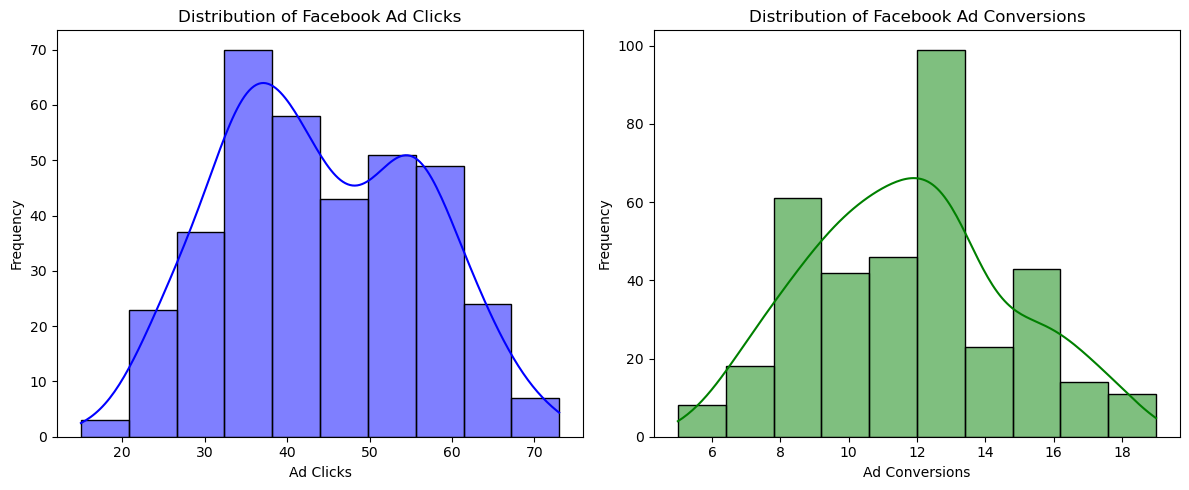

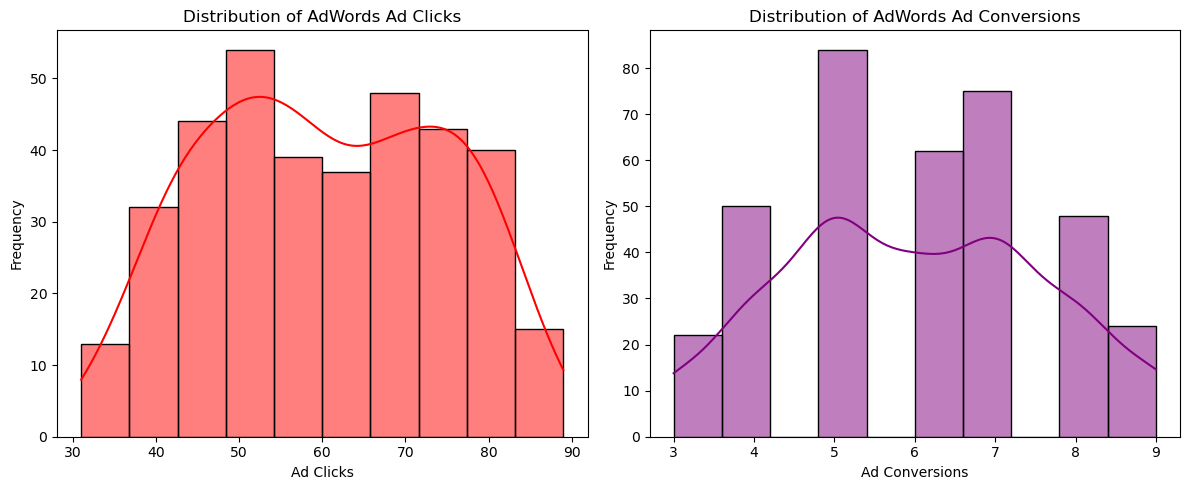

In [7]:
# Creating subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for Facebook Ad Clicks
sns.histplot(df['Facebook Ad Clicks'], bins=10, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Distribution of Facebook Ad Clicks")
axes[0].set_xlabel("Ad Clicks")
axes[0].set_ylabel("Frequency")

# Plot histogram for Facebook Ad Conversions
sns.histplot(df['Facebook Ad Conversions'], bins=10, kde=True, ax=axes[1], color='green')
axes[1].set_title("Distribution of Facebook Ad Conversions")
axes[1].set_xlabel("Ad Conversions")
axes[1].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()


# Creating subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for AdWords Ad Clicks
sns.histplot(df['AdWords Ad Clicks'], bins=10, kde=True, ax=axes[0], color='red')
axes[0].set_title("Distribution of AdWords Ad Clicks")
axes[0].set_xlabel("Ad Clicks")
axes[0].set_ylabel("Frequency")

# Plot histogram for AdWords Ad Conversions
sns.histplot(df['AdWords Ad Conversions'], bins=10, kde=True, ax=axes[1], color='purple')
axes[1].set_title("Distribution of AdWords Ad Conversions")
axes[1].set_xlabel("Ad Conversions")
axes[1].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()

In [8]:
df['Facebook Ad Conversions']

0       8
1      12
2       8
3       9
4       7
       ..
360    13
361    18
362    13
363     8
364    17
Name: Facebook Ad Conversions, Length: 365, dtype: int64

In [9]:
def create_conversion_category(conversion_col):
    category = []
    for col in df[conversion_col]:
        if col < 6:
            category.append("less than 6")
        elif 6<= col < 11:
            category.append("6-10")
        elif 11<= col < 16:
            category.append("11-15")
        else:
            category.append("more than 15")

    return category
    
df['Facebook Conversion Category'] = create_conversion_category('Facebook Ad Conversions')
df['Adwords Conversion Category'] = create_conversion_category('AdWords Ad Conversions')

In [10]:
df.head(1)

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks),Facebook Conversion Category,Adwords Conversion Category
0,2019-01-01,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30,6-10,less than 6


In [11]:
df['Facebook Conversion Category'].value_counts().sort_values(ascending=True)

Facebook Conversion Category
less than 6       1
more than 15     47
6-10            128
11-15           189
Name: count, dtype: int64

In [12]:
df['Adwords Conversion Category'].value_counts().sort_values(ascending=True)

Adwords Conversion Category
less than 6    156
6-10           209
Name: count, dtype: int64

In [13]:
facebook_df = pd.DataFrame(df['Facebook Conversion Category'].value_counts().sort_values(ascending=True).reset_index())
facebook_df = facebook_df.rename(columns={'Facebook Conversion Category': 'Category'})
facebook_df

,Category,count
0,less than 6,1
1,more than 15,47
2,6-10,128
3,11-15,189


In [14]:
adwords_df = pd.DataFrame(df['Adwords Conversion Category'].value_counts().sort_values(ascending=True).reset_index())
adwords_df = adwords_df.rename(columns={'Adwords Conversion Category': 'Category'})
adwords_df

,Category,count
0,less than 6,156
1,6-10,209


In [15]:
merged_df = pd.merge(facebook_df, adwords_df, on='Category', how='outer').fillna(0).iloc[[2,1,0,3]]
merged_df = merged_df.rename(columns={'count_x': 'Facebook', 'count_y': 'Adwords'})
merged_df

,Category,Facebook,Adwords
2,less than 6,1,156.0
1,6-10,128,209.0
0,11-15,189,0.0
3,more than 15,47,0.0


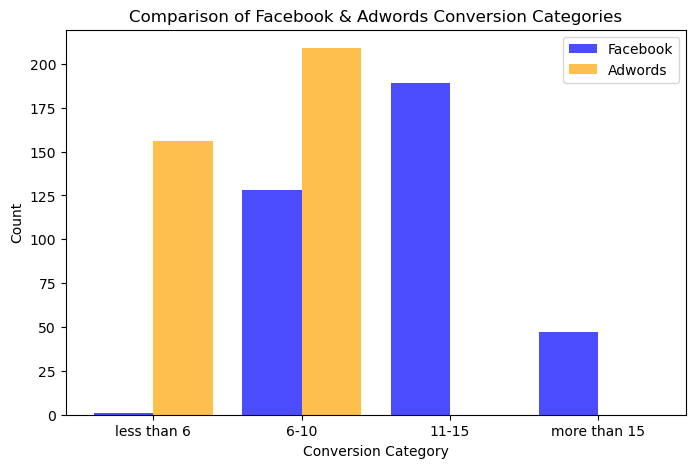

In [16]:
# Set figure size
plt.figure(figsize=(8, 5))

# Define bar width
bar_width = 0.4  
x = np.arange(len(merged_df))  # X-axis positions

# Plot bars for Facebook and Adwords
plt.bar(x, merged_df['Facebook'], width=bar_width, label='Facebook', alpha=0.7, color='blue')
plt.bar(x + bar_width, merged_df['Adwords'], width=bar_width, label='Adwords', alpha=0.7, color='orange')

# Set labels and title
plt.xticks(x + bar_width / 2, merged_df['Category'])  # Align tick labels to center
plt.xlabel('Conversion Category')
plt.ylabel('Count')
plt.title('Comparison of Facebook & Adwords Conversion Categories')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [17]:
facebook_corr = df[['Facebook Ad Clicks', 'Facebook Ad Conversions']].corr()
facebook_corr

,Facebook Ad Clicks,Facebook Ad Conversions
Facebook Ad Clicks,1.000000,0.873775
Facebook Ad Conversions,0.873775,1.000000


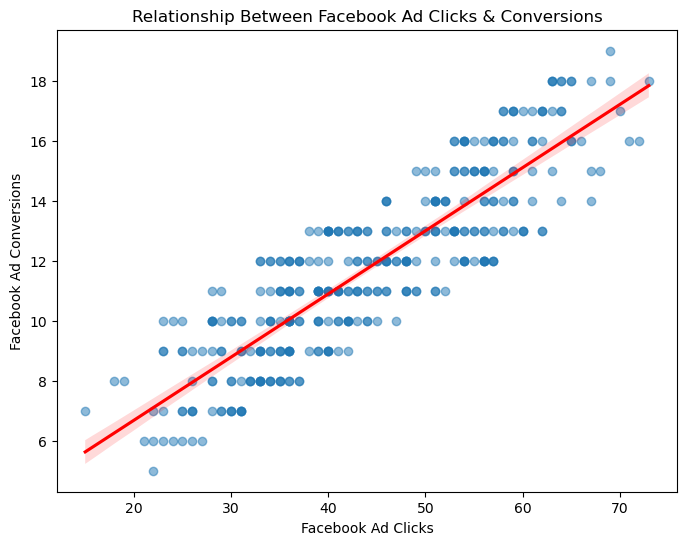

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(8, 6))
sns.regplot(x=df['Facebook Ad Clicks'], y=df['Facebook Ad Conversions'], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel('Facebook Ad Clicks')
plt.ylabel('Facebook Ad Conversions')
plt.title('Relationship Between Facebook Ad Clicks & Conversions')

# Show plot
plt.show()

In [19]:
adwords_corr = df[['AdWords Ad Clicks', 'AdWords Ad Conversions']].corr()
adwords_corr

,AdWords Ad Clicks,AdWords Ad Conversions
AdWords Ad Clicks,1.000000,0.447993
AdWords Ad Conversions,0.447993,1.000000


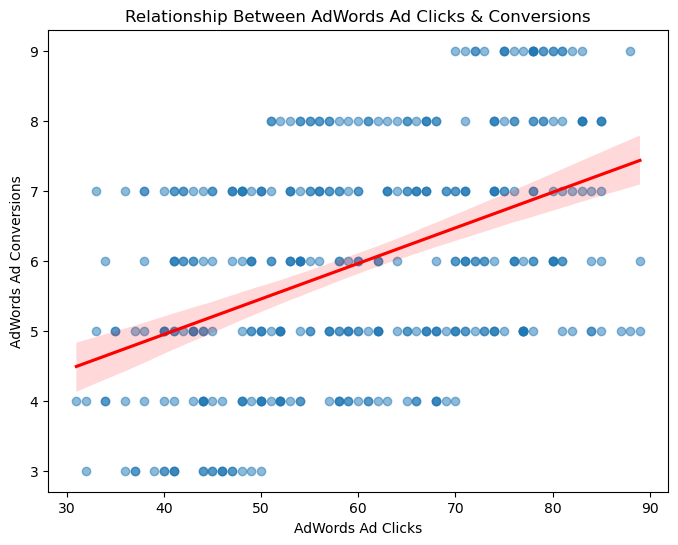

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(8, 6))
sns.regplot(x=df['AdWords Ad Clicks'], y=df['AdWords Ad Conversions'], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel('AdWords Ad Clicks')
plt.ylabel('AdWords Ad Conversions')
plt.title('Relationship Between AdWords Ad Clicks & Conversions')

# Show plot
plt.show()

In [21]:
print("Mean Conversion")
print('Facebook',df['Facebook Ad Conversions'].mean().round(2))
print('AdWords',df['AdWords Ad Conversions'].mean().round(2))

print("")
t_stat, p_value = st.ttest_ind(df['Facebook Ad Conversions'], df['AdWords Ad Conversions'], equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("✅ The difference in conversions between Facebook and AdWords is statistically significant.")
    print("📢 One platform is truly outperforming the other. Consider shifting budget accordingly.")
else:
    print("❌ The difference is NOT statistically significant.")
    print("⚠️ The conversion variations could be due to chance, and both platforms perform similarly.")

Mean Conversion
Facebook 11.74
AdWords 5.98

T-statistic: 32.8840
P-value: 9.348918164530465e-134
✅ The difference in conversions between Facebook and AdWords is statistically significant.
📢 One platform is truly outperforming the other. Consider shifting budget accordingly.


In [22]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [23]:
X = df[['Facebook Ad Clicks','Facebook Ad Views']]
y = df['Facebook Ad Conversions']

# Step 1: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 4: Make Predictions
y_pred = model.predict(X_test_scaled)

# Step 5: Evaluate Model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:",r2)
print("MSE:",mse)

R² Score: 0.7747201723377154
MSE: 2.1913314217868614


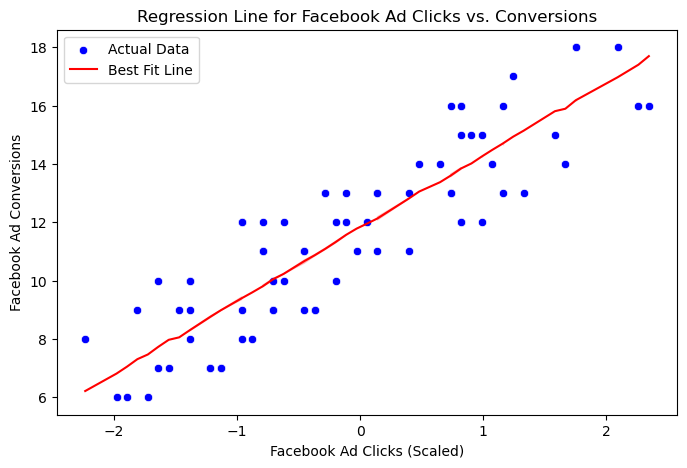

In [24]:
# Select one feature (e.g., Facebook Ad Clicks) to visualize in 2D
X_single = X_test_scaled[:, 0]  # Selecting the first feature after scaling

# Sort the values for a smoother regression line
sorted_indices = np.argsort(X_single)
X_sorted = X_single[sorted_indices]
y_sorted = y_pred[sorted_indices]

# Scatter Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_single, y=y_test, color='blue', label="Actual Data")
sns.lineplot(x=X_sorted, y=y_sorted, color='red', label="Best Fit Line")

plt.xlabel("Facebook Ad Clicks (Scaled)")
plt.ylabel("Facebook Ad Conversions")
plt.title("Regression Line for Facebook Ad Clicks vs. Conversions")
plt.legend()
plt.show()


In [25]:
from sklearn.preprocessing import PolynomialFeatures

# Step 1: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Apply Polynomial Features (Degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 3: Standardize Again After Transformation
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# Step 4: Train Polynomial Regression Model
model = LinearRegression()
model.fit(X_train_poly_scaled, y_train)

# Step 5: Make Predictions
y_pred_poly = model.predict(X_test_poly_scaled)

# Step 6: Evaluate the Model
r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)

print("Polynomial Regression R² Score:", r2_poly)
print("Polynomial Regression MSE:", mse_poly)

Polynomial Regression R² Score: 0.7701890047367612
Polynomial Regression MSE: 2.2354067837240095


In [26]:
df.head(1)

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks),Facebook Conversion Category,Adwords Conversion Category
0,2019-01-01,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30,6-10,less than 6


In [27]:
df['Cost per Facebook Ad'] = df['Cost per Facebook Ad'].str.replace('$', '', regex=False).str.strip().astype(float).astype(int)

In [28]:
df.dtypes

Date                                               datetime64[ns]
Facebook Ad Campaign                                       object
Facebook Ad Views                                           int64
Facebook Ad Clicks                                          int64
Facebook Ad Conversions                                     int64
Cost per Facebook Ad                                        int32
Facebook Click-Through Rate (Clicks / View)                object
Facebook Conversion Rate (Conversions / Clicks)            object
Facebook Cost per Click (Ad Cost / Clicks)                 object
AdWords Ad Campaign                                        object
AdWords Ad Views                                            int64
AdWords Ad Clicks                                           int64
AdWords Ad Conversions                                      int64
Cost per AdWords Ad                                        object
AdWords Click-Through Rate (Clicks / View)                 object
AdWords Co

In [29]:
X = df[['Facebook Ad Clicks','Facebook Ad Views','Cost per Facebook Ad']]
y = df['Facebook Ad Conversions']

# Step 1: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 4: Make Predictions
y_pred = model.predict(X_test_scaled)

# Step 5: Evaluate Model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:",r2)
print("MSE:",mse)

R² Score: 0.7718813514065215
MSE: 2.2189450682100875


In [30]:
feature_names = X.columns
coefficients = model.coef_

for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")

Facebook Ad Clicks: 2.4839
Facebook Ad Views: 0.0171
Cost per Facebook Ad: -0.2624


In [31]:
df['CTR'] = df['Facebook Click-Through Rate (Clicks / View)'].str.replace('%', '', regex=True)
df['CTR'] = df['CTR'].astype(float)

df['CR'] = df['Facebook Conversion Rate (Conversions / Clicks)'].str.replace('%', '', regex=True)
df['CR'] = df['CR'].astype(float)

df['CPC'] = df['Facebook Cost per Click (Ad Cost / Clicks)'].str.replace(r'[^\d.]', '', regex=True).astype(float)

df['CTR'] = df['CTR'] / 100
df['CR'] = df['CR'] / 100

In [32]:
df.head(2)

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,...,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks),Facebook Conversion Category,Adwords Conversion Category,CTR,CR,CPC
0,2019-01-01,FB_Jan19,2116,18,8,126,0.83%,42.73%,$7.14,AW_Jan19,...,5,$194,1.18%,8.40%,$3.30,6-10,less than 6,0.0083,0.4273,7.14
1,2019-01-02,FB_Jan19,3106,36,12,104,1.15%,34.04%,$2.91,AW_Jan19,...,6,$75,1.77%,7.80%,$1.05,11-15,6-10,0.0115,0.3404,2.91


In [33]:
X = df[['Facebook Ad Clicks','Facebook Ad Views','Cost per Facebook Ad','CTR','CR','CPC']]
y = df['Facebook Ad Conversions']

# Step 1: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 4: Make Predictions
y_pred = model.predict(X_test_scaled)

# Step 5: Evaluate Model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:",r2)
print("MSE:",mse)

R² Score: 0.9726521794005133
MSE: 0.26601644372208555


In [34]:
feature_names = X.columns
coefficients = model.coef_

for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")

Facebook Ad Clicks: 2.6847
Facebook Ad Views: -0.0108
Cost per Facebook Ad: 0.4222
CTR: -0.0102
CR: 1.4879
CPC: -0.7205


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select only independent variables
X = df[['Facebook Ad Clicks','Facebook Ad Views','Cost per Facebook Ad','CR']]

# Add a constant column for intercept (required for VIF)
X = X.assign(constant=1)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Drop the constant row as it's not a real feature
vif_data = vif_data[vif_data["Feature"] != "constant"]

# Display results
print(vif_data)

                Feature       VIF
0    Facebook Ad Clicks  1.260798
1     Facebook Ad Views  1.014407
2  Cost per Facebook Ad  1.023903
3                    CR  1.259509


In [36]:
X = df[['Facebook Ad Clicks','Facebook Ad Views','Cost per Facebook Ad','CR']]
y = df['Facebook Ad Conversions']

# Step 1: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 4: Make Predictions
y_pred = model.predict(X_test_scaled)

# Step 5: Evaluate Model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:",r2)
print("MSE:",mse)

R² Score: 0.9644440780007895
MSE: 0.34585790443818293


In [37]:
feature_names = X.columns
coefficients = model.coef_

for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")

Facebook Ad Clicks: 3.0999
Facebook Ad Views: 0.0093
Cost per Facebook Ad: -0.0784
CR: 1.4089


In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select only independent variables
X = df[['Facebook Ad Clicks','Facebook Ad Views','Cost per Facebook Ad','CR']]

# Add a constant column for intercept (required for VIF)
X = X.assign(constant=1)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Drop the constant row as it's not a real feature
vif_data = vif_data[vif_data["Feature"] != "constant"]

# Display results
print(vif_data)

                Feature       VIF
0    Facebook Ad Clicks  1.260798
1     Facebook Ad Views  1.014407
2  Cost per Facebook Ad  1.023903
3                    CR  1.259509


In [39]:
df.head(1)

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,...,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks),Facebook Conversion Category,Adwords Conversion Category,CTR,CR,CPC
0,2019-01-01,FB_Jan19,2116,18,8,126,0.83%,42.73%,$7.14,AW_Jan19,...,5,$194,1.18%,8.40%,$3.30,6-10,less than 6,0.0083,0.4273,7.14


In [40]:
df_facebook = df[['Date','Facebook Ad Campaign','Facebook Ad Views',
                  'Facebook Ad Clicks','Facebook Ad Conversions','Cost per Facebook Ad','CTR','CR','CPC']].copy()
df_facebook['CTR'] = df_facebook['CTR'] * 100
df_facebook['CR'] = df_facebook['CR'] * 100
df_facebook.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,CTR,CR,CPC
0,2019-01-01,FB_Jan19,2116,18,8,126,0.83,42.73,7.14
1,2019-01-02,FB_Jan19,3106,36,12,104,1.15,34.04,2.91
2,2019-01-03,FB_Jan19,3105,26,8,102,0.84,31.45,3.89
3,2019-01-04,FB_Jan19,1107,27,9,71,2.45,34.76,2.62
4,2019-01-05,FB_Jan19,1317,15,7,78,1.10,47.59,5.38


In [43]:
df_facebook['Month'] = df_facebook['Date'].dt.month
df_facebook['Weekday'] = df_facebook['Date'].dt.weekday

In [46]:
df_facebook.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,CTR,CR,CPC,Month,Weekday
0,2019-01-01,FB_Jan19,2116,18,8,126,0.83,42.73,7.14,1,1
1,2019-01-02,FB_Jan19,3106,36,12,104,1.15,34.04,2.91,1,2
2,2019-01-03,FB_Jan19,3105,26,8,102,0.84,31.45,3.89,1,3
3,2019-01-04,FB_Jan19,1107,27,9,71,2.45,34.76,2.62,1,4
4,2019-01-05,FB_Jan19,1317,15,7,78,1.10,47.59,5.38,1,5


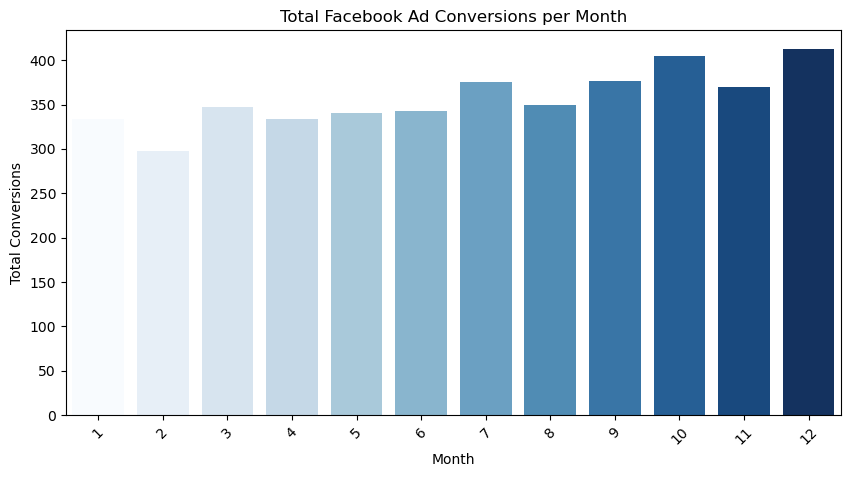

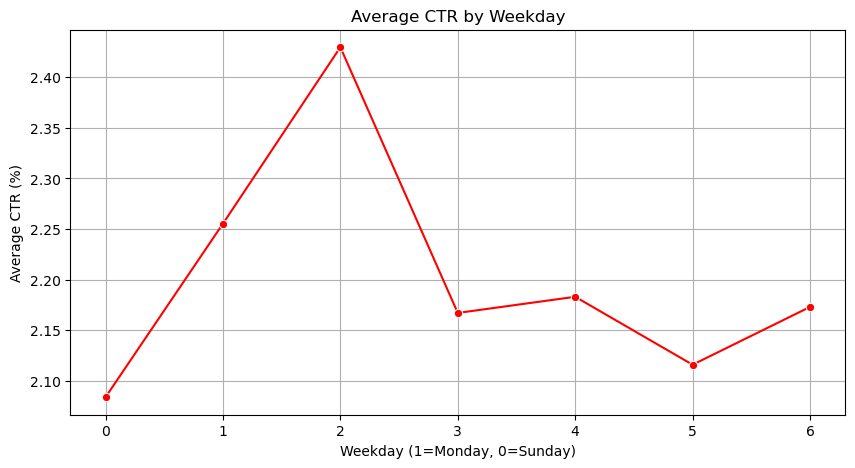

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Month and sum Ad Conversions
monthly_data = df_facebook.groupby("Month")["Facebook Ad Conversions"].sum()

# Group by Weekday and calculate mean CTR
weekly_data = df_facebook.groupby("Weekday")["CTR"].mean()

# Plot 1: Bar chart for Monthly Conversions
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_data.index, y=monthly_data.values, hue=monthly_data.index, legend=False, palette="Blues")
plt.xlabel("Month")
plt.ylabel("Total Conversions")
plt.title("Total Facebook Ad Conversions per Month")
plt.xticks(rotation=45)
plt.show()

# Plot 2: Line chart for CTR by Weekday
plt.figure(figsize=(10, 5))
sns.lineplot(x=weekly_data.index, y=weekly_data.values, marker="o", color="red")
plt.xlabel("Weekday (1=Monday, 0=Sunday)")
plt.ylabel("Average CTR (%)")
plt.title("Average CTR by Weekday")
plt.grid(True)
plt.show()

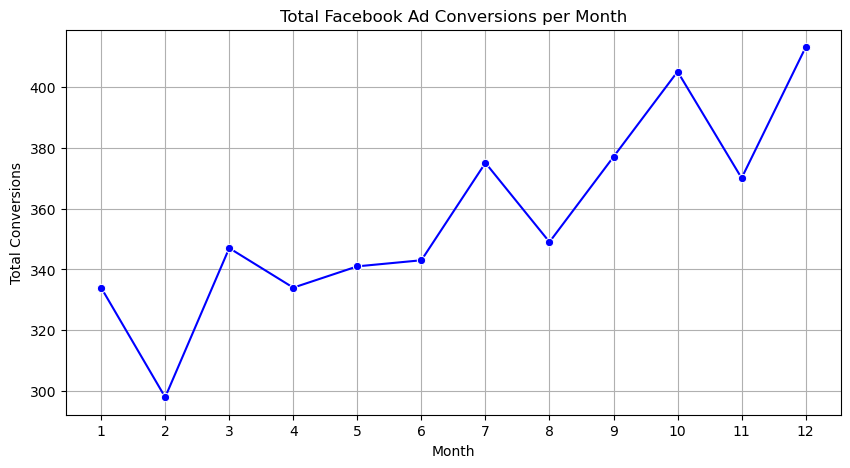

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Month and sum Ad Conversions
monthly_data = df_facebook.groupby("Month")["Facebook Ad Conversions"].sum()

# Plot: Line chart for Monthly Conversions
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_data.index, y=monthly_data.values, marker="o", color="blue")

# Labels and Title
plt.xlabel("Month")
plt.ylabel("Total Conversions")
plt.title("Total Facebook Ad Conversions per Month")
plt.grid(True)
plt.xticks(range(1, 13))  # Ensuring month numbers (1-12) are properly shown
plt.show()

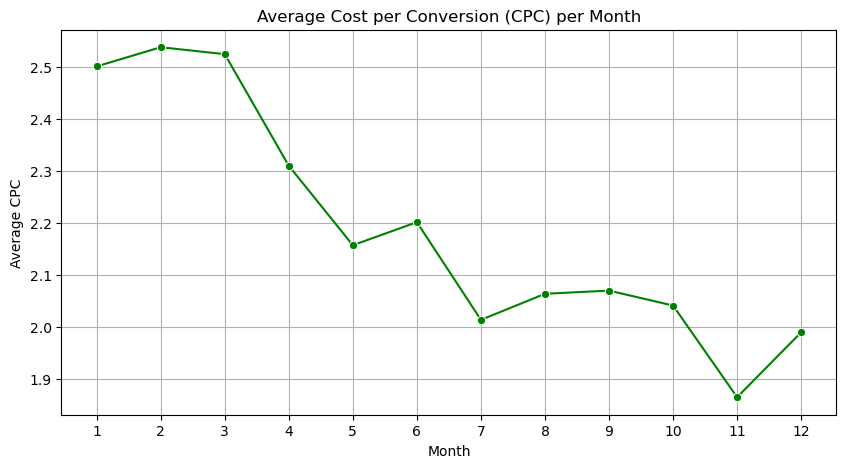

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Month and calculate the average CPC
monthly_cpc = df_facebook.groupby("Month")["CPC"].mean()

# Plot: Line chart for Monthly CPC
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_cpc.index, y=monthly_cpc.values, marker="o", color="green")

# Labels and Title
plt.xlabel("Month")
plt.ylabel("Average CPC")
plt.title("Average Cost per Conversion (CPC) per Month")
plt.grid(True)
plt.xticks(range(1, 13))  # Ensuring month numbers (1-12) are properly shown
plt.show()
